In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import mir_utils as miru
import feature_functions as ff
import madmom as md
import librosa
import multiprocessing
import sounddevice as sd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Audio
import os

#helper functions
import sys
sys.path.append("..")
import imp
import helpers
imp.reload(helpers)
imp.reload(miru)
from helpers import *

sr=48000
df=miru.audioFrames(loadCache=True,sr=48000)
save_dir="cnn_data"

def getRandomAudio(dcategories="any",fdf=df):
    #dcategories=string of categories you want, comma seperated->eg:"kick,rim,snare"
    if dcategories != "any": 
        fdf=fdf[fdf["label"].isin(dcategories.split(","))]
    random_row = np.random.randint(fdf.shape[0])
    return fdf.iloc[random_row]



loading


./dk_data
loading


./dk_data/clap
loading


./dk_data/guitar
loading


./dk_data/hat
loading


./dk_data/kick
loading


./dk_data/piano
loading


./dk_data/rim
loading


./dk_data/shake
loading


./dk_data/snare
loading


./dk_data/tom
loading


./dk_data/tom_high
loading


./dk_data/stacks


label                                               stacks
path                              ./dk_data/stacks/184.wav
audio    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 12033, dtype: object (48000,) (100, 120)


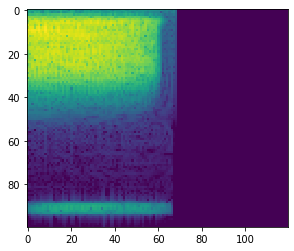

In [43]:
# this function a melspec from any 1 second audio 
# uncertainty: what's the best value for n_fft?
# time-frequency localization tradeoff 

# num_samples=2*img_dim**2-img_dim
audio_row=getRandomAudio(dcategories="any")
x,num_trimmed=cutAudio(audio_row["audio"])
z=audToImage(x,num_bins=100)

print(audio_row,x.shape,z.shape)
plt.imshow(z)
Audio(x,rate=sr, autoplay=True)

In [ ]:
audio_row=getRandomAudio(dcategories="any")
x,num_trimmed=cutAudio(audio_row["audio"])
z=audToImage(x,num_bins=100)

print(audio_row,x.shape,z.shape)
plt.imshow(z)
Audio(x,rate=sr, autoplay=True)

env=librosa.feature.rms(y=x)

plt.figure(figsize=(15, 5))
print(env.shape,env)


In [79]:
#make directoies
folders=df.label.unique()
for f in folders:
    directory="./%s/%s/%s"%(save_dir,"train",f)
    if not os.path.exists(directory):
        os.makedirs(directory)
    directory="./%s/%s/%s"%(save_dir,"test",f)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [80]:
#convert all audio in dataframe to images and put them in folders depending on the labels
df = df.sample(frac=1).reset_index(drop=True) #shuffling
trainPercent=0.8
testPercent=0.2
data_type="train"

for i,r in df.iterrows():
    fname=r["path"].split("/")[-1]
    if i>int(trainPercent*df.shape[0]):
        data_type="test"
    p="./%s/%s/%s/%s.png"%(save_dir,data_type,r["label"],fname)
    x,num_trimmed=cutAudio(r["audio"])
    z=audToImage(x)
    I=np.asarray(z)
    I8 = (((I - I.min()) / (I.max() - I.min())) * 255).astype(np.uint8)
    img = Image.fromarray(I8)
    img.save(p)

/home/asalimi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
